<a href="https://colab.research.google.com/github/Ayubbett/Moringa-school-week-7-Core-Independent-Project/blob/main/Moringa_Data_Science_Core_W7_Independent_Project_2021_11_AYUB_BETT_Python_Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **FACTORS AFFECTING HOUSING PRICES**

# Assessment Question

As a Data Scientist, you work for Hass Consulting Company which is a real estate leader with over 25 years of experience. You have been tasked to study the factors that affect housing prices using the given information on real estate properties that was collected over the past few months. Later onwards, create a model that would allow the company to accurately predict the sale of prices upon being provided with the predictor variables. 

# 1. Defining the Question

# a) Specifying the Question

Given a dataset containing factors that might affect theprices of housing price, we work on behalf of  Hass Consulting Company which is a real estate leader with over 25 years of experience to build a model that will help evaluate the price of a house given some features about it.

# b) Defining the Metric for Success

We will build a model basing our research on five regression techniques with our aim of having 70 percent accuracy score on the data.

# c) Understanding the context

Hall Consulting Company is a real estate company that has been around the scene for over 25 years now. Their main goal is to provide affordable housing for their customers. That said, they have collected data from their previously sold houses which include features that make different houses stand out from the rest. Our goal is to create a model that predicts the price of a house given some of the features. We will also advise them on what to make better basing on the fact their coefficients will be high compared to others and likewise put minimum attention to some features.

# d) Recording the Experimental Design


Below is the expected flow of the analysis
*   Find and deal with outliers, anomalies, and missing data within   the dataset.
*   Perform univariate, bivariate and multivariate analysis recording your observations.

*   Performing regression analysis.
*   Incorporate categorical independent variables into your models.

*   Check for multicollinearity
*   Provide a recommendation based on your analysis.

*   Create residual plots for your models, and assess heteroskedasticity using Barlett's test.
*   Challenge your solution by providing insights on how you can make improvements in model improvement.











# e) Data relevance / Appropriateness of Data

Below are the expalanation of the column names

*   Id - Identification of the entry
*   price  - Price of the house

*   bedrooms - Number of Bedrooms
*   bathrooms - Number of Bathrooms

*   sqft_living - Square feet area of living area
*   sqft_lot  - Square feet area of parking Layout

*   floors - Number of Floors
*   waterfront - Whether waterfront is there or not

*   view - Number of Views
*   grade - Grades

*   sqft_above
*   sqft_basement - Square feet area off basement

*   yr_built - Year the house is built
*   yr_renovated - Year the house is renovated

*   zipcode - zipcode os the house
*   lat : Latitude of the house

*   lon : Longitude of the house
*   sqft_living15

*   sqft_lot15













**Data Exploration**

**Importing Libraries**

In [1]:
#Importing libraries we will use for data manipulation and visualization
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

**Reading the Data**

In [3]:
house_df = pd.read_csv("Independent Project Week 7 - house_data.csv")

**Data Exploration**

In [4]:
#Checking the top of the housing dataset
house_df.head()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [5]:
#Checking the bottom of the house dataset
house_df.tail()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
21608,263000018,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,400000.0,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287
21612,1523300157,325000.0,2,0.75,1020,1076,2.0,0,0,3,7,1020,0,2008,0,98144,47.5941,-122.299,1020,1357


In [6]:
#Checking the number of columns and rows
house_df.shape

(21613, 20)

This housing dataset has 21613 rows and 20 columns

**Data Wrangling**

In [7]:
#Checking for duplicates in the datasets
house_df.duplicated().sum()

3

We have 3 duplicates in our dataset so we are going to drop them

In [8]:
#Dropping the duplicated values
house_df.drop_duplicates(inplace=True)

In [9]:
#Recheking if the duplicates were dropped
house_df.duplicated().sum()

0

There are no more duplicates we are good to go to the next one

In [10]:
#Checking for null values
house_df.isnull().sum()

id               0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

There are no null values in our dataset

In [11]:
#Checking for the descriptive statistics of the dataset
house_df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161000e+04,2.161000e+04,21610.000000,21610.000000,21610.000000,2.161000e+04,21610.000000,21610.000000,21610.000000,21610.000000,21610.000000,21610.000000,21610.000000,21610.000000,21610.000000,21610.000000,21610.000000,21610.000000,21610.000000,21610.000000
mean,4.580161e+09,5.401789e+05,3.370847,2.114739,2079.881212,1.510829e+04,1.494239,0.007543,0.234197,3.409440,7.656779,1788.347894,291.533318,1971.003609,84.322351,98077.945673,47.560049,-122.213910,1986.518695,12769.031976
std,2.876547e+09,3.673876e+05,0.930110,0.770204,918.500299,4.142323e+04,0.539994,0.086523,0.766136,0.650764,1.175500,828.138723,442.596699,29.372639,401.499264,53.505373,0.138572,0.140833,685.425781,27305.972464
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.216125e+05,3.000000,1.750000,1425.500000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.470925,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.619000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068875e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [12]:
#Checking the datatypes of the columns
house_df.dtypes

id                 int64
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

What we notice from this is that year built and year renovated are both integers so we change to datetime

In [13]:
# converting year to datetime
house_df['yr_built'] = pd.to_datetime(house_df['yr_built'])
house_df['yr_renovated'] = pd.to_datetime(house_df['yr_renovated'])

In [14]:
# Dropping irrelevant columns
house_df.drop(columns=['id', 'lat', 'long', 'waterfront', 'view', 'yr_renovated', 'zipcode', 'yr_built'], axis=1, inplace=True)

In [15]:
#Checking the shape of the dataset after dropping the unnecessary columns
house_df.shape

(21610, 12)

# Checking for Outliers

In [16]:
# Checking for Outliers
#

Q1 = house_df.quantile(0.25)
Q3 = house_df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

price            323387.50
bedrooms              1.00
bathrooms             0.75
sqft_living        1124.50
sqft_lot           5648.75
floors                1.00
condition             1.00
grade                 1.00
sqft_above         1020.00
sqft_basement       560.00
sqft_living15       870.00
sqft_lot15         4983.00
dtype: float64


From this Interquantile range scores we notice some values are way above the expected range, so we plot boxplots to visualize them

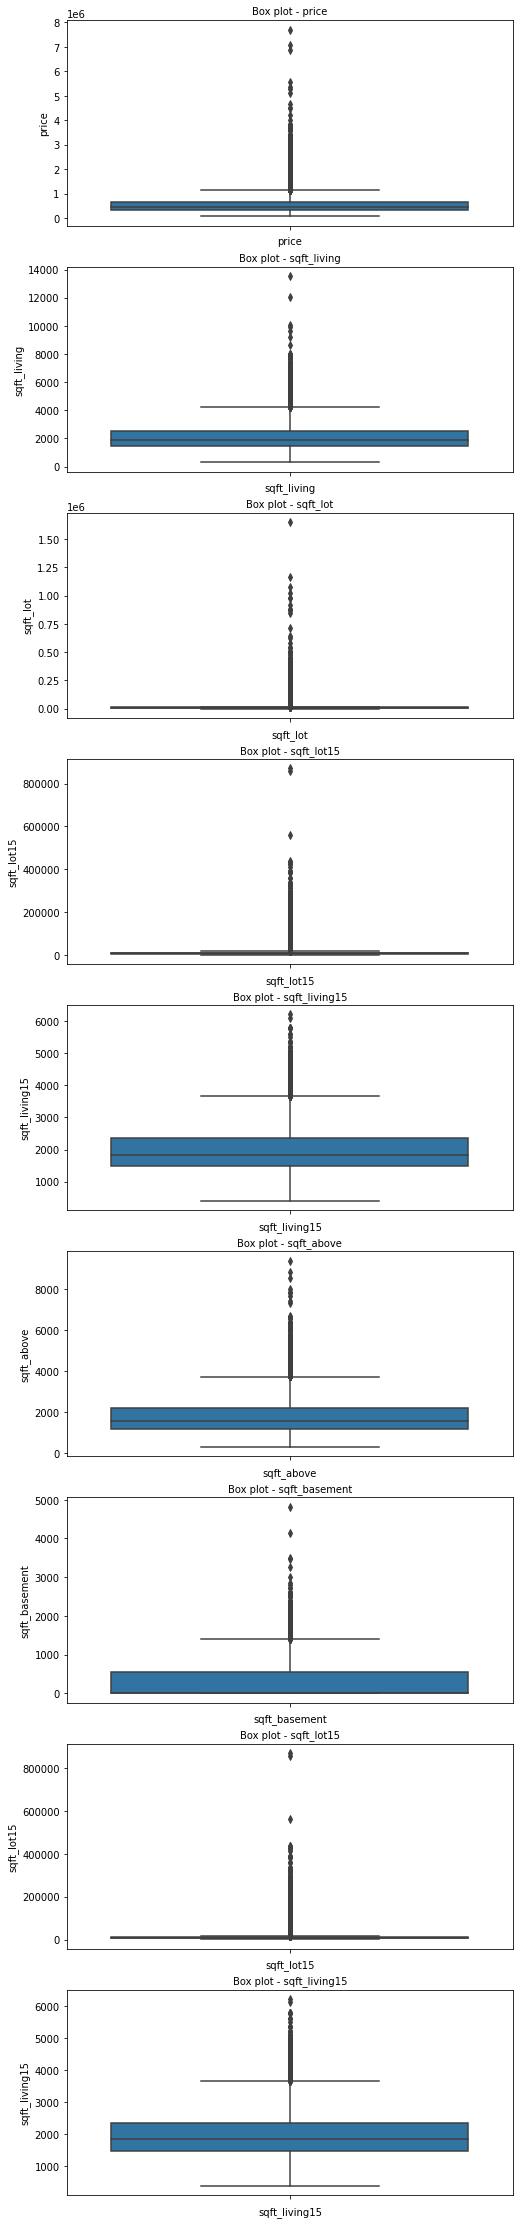

In [17]:
#Plotting boxplots to detect outliers in the various columns


col_names = ['price','sqft_living','sqft_lot', 'sqft_lot15', 'sqft_living15', 'sqft_above', 'sqft_basement', 'sqft_lot15', 'sqft_living15']

fig,ax = plt.subplots(len(col_names),figsize=(8,40))
for i , col_val in enumerate(col_names):
  sns.boxplot(y=house_df[col_val],ax=ax[i])
  ax[i].set_title('Box plot - {}'.format(col_val), fontsize =10)
  ax[i].set_xlabel(col_val,fontsize=10)
plt.show()

We can now drop the outliers that are way outside our desired range

In [18]:
# dealing with outliers

# quantiles
Q1 = house_df.quantile(0.25)
Q3 = house_df.quantile(0.75)
IQR = Q3 - Q1

# Removing outliers based on the IQR range 
df = house_df[~((house_df < (Q1 - 1.5 * IQR)) | (house_df > (Q3 + 1.5 * IQR))).any(axis=1)]

# Printing the shape of our new dataset
print(df.shape)

# Printing the shape of our old dataset
print(house_df.shape)

(16612, 12)
(21610, 12)


From that we notice that there are no longer any outliers

# **EXPLORATORY DATA ANALYSIS**

**UNIVARIATE ANALYSIS**

In [19]:
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,sqft_above,sqft_basement,sqft_living15,sqft_lot15
count,1.661200e+04,16612.000000,16612.000000,16612.000000,16612.000000,16612.000000,16612.000000,16612.000000,16612.000000,16612.000000,16612.000000,16612.000000
mean,4.524053e+05,3.269083,1.984574,1838.827354,7054.684987,1.466079,3.417108,7.401637,1590.670178,248.157176,1815.761558,6932.756381
std,1.895564e+05,0.775242,0.649025,623.932141,3384.975688,0.544185,0.644826,0.811774,599.165058,366.895185,514.988225,3015.852296
min,8.200000e+04,2.000000,0.750000,560.000000,520.000000,1.000000,2.000000,6.000000,480.000000,0.000000,620.000000,651.000000
25%,3.055000e+05,3.000000,1.500000,1360.000000,4750.000000,1.000000,3.000000,7.000000,1150.000000,0.000000,1440.000000,4820.000000
50%,4.190000e+05,3.000000,2.000000,1770.000000,7029.500000,1.000000,3.000000,7.000000,1440.000000,0.000000,1720.000000,7169.000000
75%,5.641125e+05,4.000000,2.500000,2240.000000,9000.000000,2.000000,4.000000,8.000000,1920.000000,500.000000,2130.000000,8744.000000
max,1.130000e+06,5.000000,3.500000,4200.000000,19141.000000,3.500000,5.000000,9.000000,3740.000000,1400.000000,3640.000000,17550.000000


The above output describe the general descriptive statistics of the columns which include the means and standard deviation of each column.

Below are the value counts of number of bedrooms, floors and bedrooms

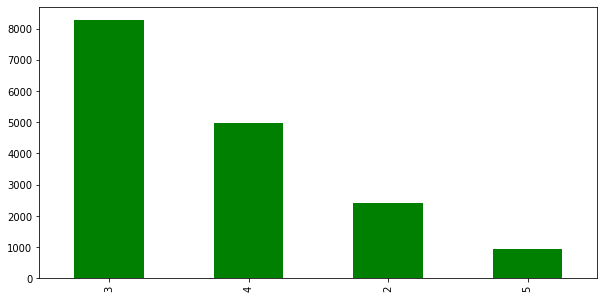

In [20]:
plt.figure(figsize = (10,5))
df['bedrooms'].value_counts().plot(kind = 'bar', color = 'green')

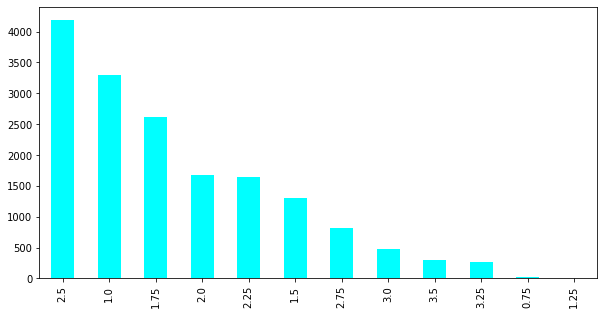

In [21]:
plt.figure(figsize = (10,5))
df['bathrooms'].value_counts().plot(kind = 'bar', color = 'Cyan')

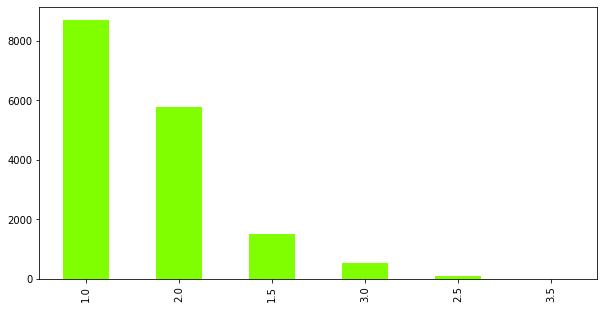

In [22]:
plt.figure(figsize = (10,5))
df['floors'].value_counts().plot(kind = 'bar', color = 'Chartreuse')

From the above count plot bars we notice the following:

*   Most houses sold had 1 floor compared to the rest.
*   Similarly the most houses sold previously had more than 2 bathrooms.

*   And lastly, the most houses sold had 3 bedrooms.






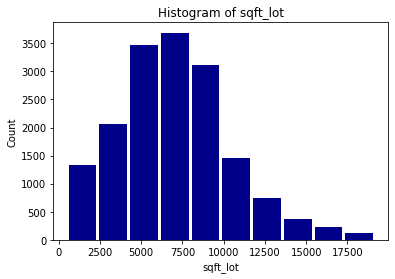

In [23]:
#Plotting histograms of individual columns to see their distribution
#plotting  Histogram
x = df['sqft_lot']
num_bins = 10

plt.hist(x, bins=10, histtype='bar', rwidth=0.9, color = 'DarkBlue')

plt.xlabel("sqft_lot")
plt.ylabel("Count")
plt.title('Histogram of sqft_lot') 
plt.show()

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0, flags=flags)


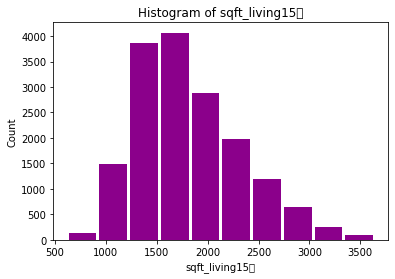

In [24]:
x = df['sqft_living15']
num_bins = 10

plt.hist(x, bins=10, histtype='bar', rwidth=0.9, color = 'DarkMagenta')

plt.xlabel("sqft_living15	")
plt.ylabel("Count")
plt.title('Histogram of sqft_living15	') 
plt.show()

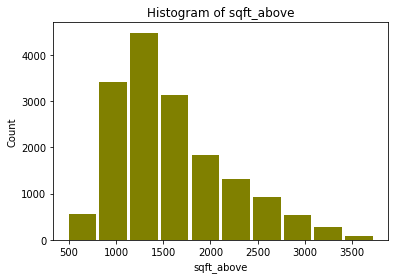

In [25]:
x = df['sqft_above']
num_bins = 10

plt.hist(x, bins=10, histtype='bar', rwidth=0.9, color = 'Olive')

plt.xlabel("sqft_above")
plt.ylabel("Count")
plt.title('Histogram of sqft_above') 
plt.show()

From the above histograms we note the follwing:

*   Most sold houses had a square lot of 5000 to 10000 meters square
*   Most sold houses had a square living of between 1200 and 2000 meters. 

*   most houses sold before have squarefeet of beween 1000 and 1500 meters
*   List item





**Bivariate Analysis**

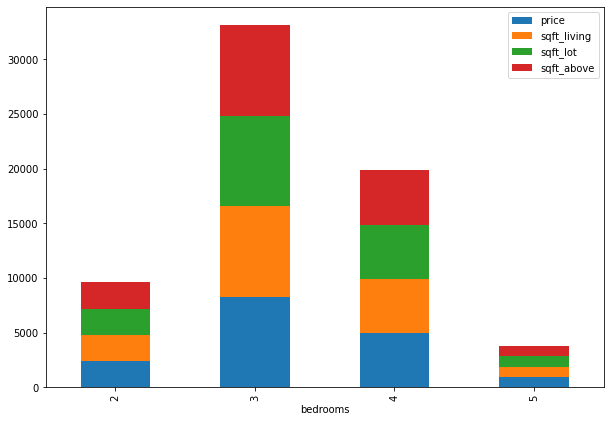

In [26]:
# plotting a stacked bar graph of number of bedrooms against various features

x= df[['bedrooms','price','sqft_living','sqft_lot', 'sqft_above']]
y= x.set_index('bedrooms')
z=y.groupby('bedrooms').count()


z.plot.bar(stacked=True, figsize = [10,7])

From this stacked barchsrt we notice that 3 bedrooms have the largest accumulation of features which also infers to the fact that it is the most preferred type of house.

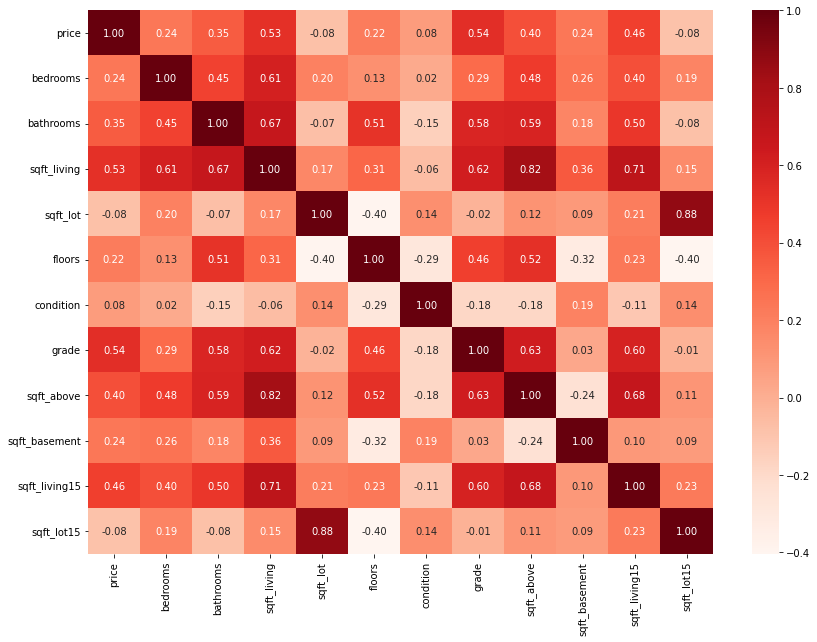

In [27]:
#Plotting a heat map to show correlation between the different variables
plt.figure(figsize=(14,10))
sns.heatmap(df.corr(),annot=True,cmap="Reds",fmt=".2f");
plt.show()

From the correlation we can note that:


*   There is a very high correlation between squarefeet living and squarefeet above.
*   Similarly there is a moderate correlation between bathrooms and squarefeet 15.

*   There is a strong correlation between squarefeet above above and the number of floors.
*   Also there is a high correlation between number of bathrooms and grade. 






# **Multivarite Analysis**

We are going to perform dimensionality reduction technique using Linear dicriminant analysis(LDA) since our case is a supervised learning problem. In that we have a target column in which it is The price of the house.

In [102]:
# Separating our target label from the other features
feat= df.drop(['price'], axis= 1)
target = df['price']

# Subject our features to LDA model

# Import Linear Discriminant Analysis method from sklearn library
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

# Create an instance of LDA
lda = LDA()

lda_= lda.fit(feat, target)
lda_feat = lda_.transform(feat)

# Display the coefficients of the reducted columns
lda_.coef_

# Since the coefficients are in an array, we need to create a dataframe so 
#that we can extract the name of the columns

f_imp = pd.DataFrame(index=feat.columns.values, data=lda_.coef_[0].T)
f_imp.sort_values(0, ascending=False)

,0
floors,1.522054
bedrooms,1.096865
sqft_lot15,0.001114
sqft_lot,-0.000203
sqft_above,-0.001119
sqft_basement,-0.001805
sqft_living,-0.002009
sqft_living15,-0.002533
bathrooms,-0.410453
condition,-2.483094


From our linear dicriminant analysis we notice that the most important features that help in price of a house are, number of floors, number of bedrooms, square feet lot15, square feet lot, square feet above, square feet basement and square feet basement

We are going to create a datframe with the features with the best scores from our reduction techniques.

In [105]:
#Dropping the least effective features then compare with when we have all features.
lda_best = df.drop(['bathrooms', 'condition', 'grade', 'sqft_living15'], axis = 1)

#Viewing the remaining columns
lda_best.head()

,price,bedrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,sqft_lot15
0,221900.0,3,1180,5650,1.0,1180,0,5650
1,538000.0,3,2570,7242,2.0,2170,400,7639
2,180000.0,2,770,10000,1.0,770,0,8062
3,604000.0,4,1960,5000,1.0,1050,910,5000
4,510000.0,3,1680,8080,1.0,1680,0,7503


# **REGRESSION ANALYSIS**

Since we are trying to build a linear model we first state its assumptions and the resulting plots when they are violated. 

1.   There should be a linear and additive relationship between dependent also called response variable with the independent(predictor) variable.
2.   There should be no correlation the residuals (error) terms. Absence of this phenomenon is called Autocorrelation.

3.   there should be correlation between the independent variables, absence of this is called multicollinearity.
4.   The error terms should have constant variance this is called,homoskedasticity. The presence of non constant variance is heteroskedasticity.

5.   The error term must be normally distributed.

We will first begin by checking for multicollinearity and linearity then check the rest after getting our model.








**Multicollinearity**

In [29]:
#picking the numerical columns to check for multicollinearity
num_col = df[['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'sqft_above', 'sqft_basement', 'sqft_living15', 'sqft_lot15']]

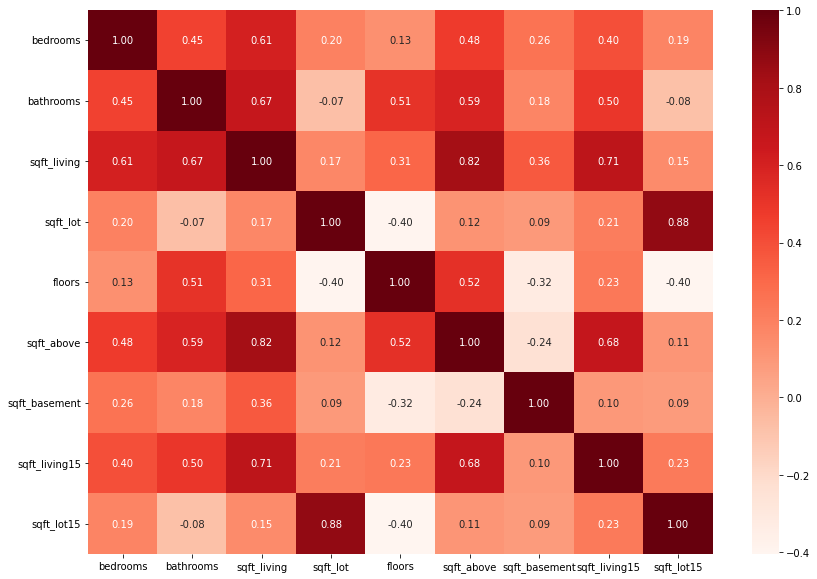

In [30]:
#Using correlation heatmap
#Plotting a heat map to show correlation between the different variables
plt.figure(figsize=(14,10))
sns.heatmap(num_col.corr(),annot=True,cmap="Reds",fmt=".2f");
plt.show()

From this we note that there is a very high multicollinearity among some variables, we can also check their VIF scores to confirm the same.

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
  
# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = num_col.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(num_col.values, i)
                          for i in range(len(num_col.columns))]
  
print(vif_data)

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
/usr/local/lib/python3.7/dist-packages/statsmodels/stats/outliers_influence.py:185: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


         feature        VIF
0       bedrooms  23.809611
1      bathrooms  24.365777
2    sqft_living        inf
3       sqft_lot  24.000967
4         floors  14.804896
5     sqft_above        inf
6  sqft_basement        inf
7  sqft_living15  27.238252
8     sqft_lot15  27.535616


similarly we the same problem we can try removing a few corelated columns to check is perfomance. The VIF scores are very high meaning they are severely correlated.

By trying to remove the correlated values we end up with only two independent variables , we will work with then then use other regression techniques that can tolarate multicollinearity.

As of the assumptions of the Ordinary Least squares method, we are going to check them after creating our model.

**A) Multiple Linear Regression**

# 1) Using all the feature sets

Below we are separating our target variable from our feature set.

In [134]:
X1 = df.drop(["price"], axis = 1)
y1 = df['price']

Scaling our feature so as to avoid large dicrepancies

In [135]:
from sklearn.preprocessing import StandardScaler

# Scaling data 
#
scaler = StandardScaler()
scaler.fit(X1)
X1 = scaler.transform(X1)

In [136]:
#Splitting the dataset into test and train sets
from sklearn.model_selection import train_test_split

# Use 20% of the data as test
# The rest will be our training set
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.2, random_state=0)


In [138]:
#Fitting the linear regression into the model
from sklearn.linear_model import LinearRegression

regressor = LinearRegression()

regressor.fit(X1_train, y1_train)

#display the intercept / bias
print(regressor.intercept_)

#display the coefficient
print(regressor.coef_)

452215.2963080063
[-9.54686634e+03 -2.65451698e+04  9.49566425e+16 -1.15637458e+04
 -6.82205546e+02  3.13918353e+04  6.94296400e+04 -9.11873238e+16
 -5.58380192e+16  3.23744912e+04 -2.84663094e+04]


From this we have its intercept and its coefficients.

In [139]:
y1_pred = regressor.predict(X1_test)

#Equating our r^2 accuracy score so that we will compare with when using other techniques
Multiple_linear_R2 = j = r2_score(y1_test, y1_pred)
print("The R2 score for the multiple linear regression model is:", Multiple_linear_R2)

The R2 score for the multiple linear regression model is: 0.43321846497285055


Looking at our accuracy metrics using different techniques we find the following:

In [38]:
from sklearn.metrics import mean_absolute_error
print("MAE",mean_absolute_error(y1_test,y1_pred))

from sklearn.metrics import mean_squared_error
print("MSE",mean_squared_error(y1_test,y1_pred))

print("RMSE",np.sqrt(mean_squared_error(y1_test,y1_pred)))

print("RMSLE",np.log(np.sqrt(mean_squared_error(y1_test,y1_pred))))

from sklearn.metrics import r2_score
r2 = r2_score(y1_test,y1_pred)
print(r2)

MAE 111782.4211548833
MSE 20404561284.67887
RMSE 142844.5353686268
RMSLE 11.869512152594874
0.43321846497285055


From our accuracy metrics we can say that we have 43 percent accuracy and since it doesnt meet our treshhold for metrics of success we try Reducing the previously seen heavily correlarated features.

# 2)  Using LDA best Coefficients to create the model

In [132]:
X = lda_best.drop(["price"], axis = 1)
y = lda_best['price']

from sklearn.preprocessing import StandardScaler

# Scaling data 
#
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

#Splitting the dataset into test and train sets
from sklearn.model_selection import train_test_split

# Use 20% of the data as test
# The rest will be our training set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

#Fitting the linear regression into the model
from sklearn.linear_model import LinearRegression

regressor = LinearRegression()

regressor.fit(X_train, y_train)

#display the intercept / bias
print(regressor.intercept_)

#display the coefficient
print(regressor.coef_)

y_pred = regressor.predict(X_test)

Multiple_linear_lda_features_R2 = k = r2_score(y_test, y_pred)
print("The R2 score for the multiple linear regression model with 7 features is:", Multiple_linear_R2)

#getting the accuracy score using different metrics
from sklearn.metrics import mean_absolute_error
print("MAE",mean_absolute_error(y_test,y_pred))

from sklearn.metrics import mean_squared_error
print("MSE",mean_squared_error(y_test,y_pred))

print("RMSE",np.sqrt(mean_squared_error(y_test,y_pred)))

print("RMSLE",np.log(np.sqrt(mean_squared_error(y_test,y_pred))))

from sklearn.metrics import r2_score
r2 = r2_score(y_test,y_pred)
print(r2)

452574.9176750458
[-1.94430874e+04  5.69091646e+17 -1.82080000e+04 -1.36000000e+03
 -5.46501465e+17 -3.34646944e+17 -1.59520000e+04]
The R2 score for the multiple linear regression model with 7 features is: 0.43321846497285055
MAE 124249.15583583711
MSE 24739682091.971985
RMSE 157288.5313427905
RMSLE 11.96583717693374
0.31280095677919684


# 3) Removing the the heavily correlated features.

In [140]:
# Separating the feature and target variables
X11 = df[['bedrooms', 'bathrooms', 'sqft_living', 'floors',
       'condition', 'grade', 'sqft_above', 'sqft_basement']]
y11 = df['price']

In [141]:
from sklearn.preprocessing import StandardScaler

# Scaling data 
#
scaler = StandardScaler()
scaler.fit(X11)
X11 = scaler.transform(X11)

In [142]:
#Splitting the dataset into test and train sets
from sklearn.model_selection import train_test_split

# Use 20% of the data as test
# The rest will be our training set
X11_train, X11_test, y11_train, y11_test = train_test_split(X11, y11, test_size=0.2, random_state=0)

In [143]:
#Fitting the linear regression into the model
from sklearn.linear_model import LinearRegression

regressor = LinearRegression()

regressor.fit(X11_train, y11_train)

#display the intercept / bias
print(regressor.intercept_)

#display the coefficient
print(regressor.coef_)

452400.6434153125
[-1.46777233e+04 -2.40854016e+04  1.19915272e+17  1.77261596e+04
  2.86458592e+04  7.66394843e+04 -1.15155217e+17 -7.05146171e+16]


In [144]:
y11_pred = regressor.predict(X11_test)

Multiple_linear_drop_three_R2 = l = r2_score(y11_test, y11_pred)
print("The R2 score for the multiple linear regression modelwith dropped features is:", Multiple_linear_R2)

The R2 score for the multiple linear regression modelwith dropped features is: 0.43321846497285055


In [145]:
from sklearn.metrics import mean_absolute_error
print("MAE",mean_absolute_error(y11_test,y11_pred))

from sklearn.metrics import mean_squared_error
print("MSE",mean_squared_error(y11_test,y11_pred))

print("RMSE",np.sqrt(mean_squared_error(y11_test,y11_pred)))

print("RMSLE",np.log(np.sqrt(mean_squared_error(y11_test,y11_pred))))

from sklearn.metrics import r2_score
r2 = r2_score(y11_test,y11_pred)
print(r2)

MAE 115804.35273718674
MSE 21580252766.62928
RMSE 146902.18775303953
RMSLE 11.89752225485597
0.4005610501153919


Suprisingly the accuracy has dropped further so we will stick to the first model using all the feature sets but try other regression techniques that tolarate multicollinearity and check their metrics.

In [46]:
import statsmodels.api as sm

X_constant = sm.add_constant(X1)
lin_reg = sm.OLS(y1,X_constant).fit()
lin_reg.summary()

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.432
Model:                            OLS   Adj. R-squared:                  0.432
Method:                 Least Squares   F-statistic:                     1263.
Date:                Sat, 27 Nov 2021   Prob (F-statistic):               0.00
Time:                        07:51:48   Log-Likelihood:            -2.2075e+05
No. Observations:               16612   AIC:                         4.415e+05
Df Residuals:                   16601   BIC:                         4.416e+05
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4.524e+05   1108.721    408.042      0.000     4.5e+05    4.55e+05
x1         -9745.4580   1437.042     -6.782      0.000   -1.26e+04   -6928.703
x2         -2.588e+04   1726.161    -14.993      0.000   -2.93e+04   -2.25e+04
x3          3.739e+04   1194.380     31.306      0.000    3.51e+04    3.97e+04
x4         -1.124e+04   2360.000     -4.761      0.000   -1.59e+04   -6610.822
x5           880.0193   1774.785      0.496      0.620   -2598.748    4358.787
x6          3.216e+04   1173.762     27.397      0.000    2.99e+04    3.45e+04
x7            6.9e+04   1626.362     42.426      0.000    6.58e+04    7.22e+04
x8          1.714e+04   1198.096     14.303      0.000    1.48e+04    1.95e+04
x9           3.56e+04   1139.539     31.241      0.000    3.34e+04    3.78e+04
x10         3.318e+04   1728.230     19.197      0.000    2.98e+04    3.66e+04
x11        -2.806e+04   2364.764    -11.868      0.000   -3.27e+04   -2.34e+04
==============================================================================
Omnibus:                      993.607   Durbin-Watson:                   1.979
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1292.047
Skew:                           0.567   Prob(JB):                    2.73e-281
Kurtosis:                       3.763   Cond. No.                     6.24e+15
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.81e-27. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

From this output we notice that our model suffers largely from multi collinearity.

**ASSUMPTION 2: AUTOCORRELATION**

From the Durbin Watson test for autocorrelation, it states the following bounds 

*   If: DW = 2 Then there is no correlation
*       0 < DW < 2 then there is a positive correlation  between the error terms.

*       2 < DW < 4 then there is a negative correlation among the error terms.

Therefore since our Dw figure is 1.979 we can say that there is a positive correlation between the error terms/residuals. Hence there is autocorrelation.






**ASSUMPTION 3: LINEARITY** 

**Residuals Plot**

In [47]:
#To find the residual mean:
residuals = np.subtract(y1_pred, y1_test)

#Describe the residual:
pd.DataFrame(residuals).describe()
residuals.mean()

-1286.5023114641604

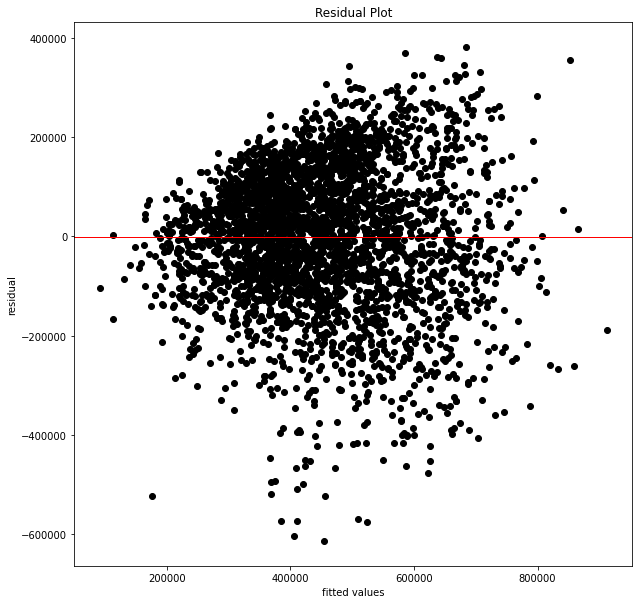

In [48]:
#Plotting the residual plot: 
plt.figure(figsize = (10,10))
plt.scatter(y1_pred, residuals, color='black')
plt.ylabel('residual')
plt.xlabel('fitted values')
plt.axhline(y= residuals.mean(), color='red', linewidth=1)
plt.title('Residual Plot')
plt.show()

By looking at the residuals plot we can confidently say that it's funnel shaped. This gives us the impression that there is no constant variance among the error terms. It can imply that the data doesnt follow a linear pattern hence implying non linearity.

We can also conclude that using Multiple linear regression isnt the best way to get the prices prediction.

**ASSUMPTION 4: HETEROSKEDASTICITY**

**Barlett's Test of Heteroscedasticity**

In [50]:
import scipy as sp

test_result, p_value = sp.stats.bartlett(y1_pred, residuals)

# We compute a critical value of the chi squared distribution
degree_of_freedom = len(y1_pred)-1
probability = 1 - p_value

critical_value = sp.stats.chi2.ppf(probability, degree_of_freedom)
print("The critical value is:", critical_value)

# If the test_result is greater than the critical value, then
# this would mean that there are patterns to the variance of the data

# Otherwise, we can identify no patterns, and we accept that 
# the variance is homogeneous across our data

if (test_result > critical_value):
  print('the variances are unequal, and there is Heteroscedasticity.')
else:
  print('The variances are homogeneous hence there is Homoscedasticity.')

The critical value is: 3975.613861541461
The variances are homogeneous hence there is Homoscedasticity.


**ASSUMPTION 5: NORMAL DISTRIBUTION OF ERROR TERMS**

In [51]:
lin_reg.resid.mean()

-7.720959596847185e-11

From this results the error terms roughly indicate a mean of  0. So we can state that the OLS assumption was met here.

From the above we notice that the highest accuracy achieved was 43.32 percent so we are going to try using other techniques and see if it changes.

**QUANTILE REGRESSION**

Quantile regression is used when you want to find the effect of regression at particular points say 20 percentile or so. Its an extension of multiple Linear regression but does not use mean.

In [182]:
%matplotlib inline

In [146]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt

In [147]:
# Splitting our data into training and test sets

X2 = df[['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'condition', 'grade', 'sqft_basement', 'sqft_living15', 'sqft_lot15']].values
y2 = df['price'].values
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.25, random_state=0)

In [148]:
# Finding the regression coefficients for the conditioned median, 0.5 quantile

import statsmodels.formula.api as smf
mod = smf.quantreg('y2 ~ X2', df)
res = mod.fit(q=.5)
res
# Then print out the summary of our model
#
print(res.summary())

                         QuantReg Regression Results                          
Dep. Variable:                     y2   Pseudo R-squared:               0.2546
Model:                       QuantReg   Bandwidth:                   2.624e+04
Method:                 Least Squares   Sparsity:                    3.427e+05
Date:                Sat, 27 Nov 2021   No. Observations:                16612
Time:                        10:39:04   Df Residuals:                    16601
                                        Df Model:                           10
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -4.663e+05   1.76e+04    -26.444      0.000   -5.01e+05   -4.32e+05
X2[0]       -1.55e+04   2222.664     -6.973      0.000   -1.99e+04   -1.11e+04
X2[1]      -4.764e+04   3189.049    -14.939      0.000   -5.39e+04   -4.14e+04
X2[2]         93.8761      4.498     20.870      0.0

In [151]:
# This is our prediction for price based on our model
y2_pred = res.predict()

quantile_R2 = m = r2_score(y2, y2_pred)
print("The R2 score for the quantile regression model is:", quantile_R2)

The R2 score for the quantile regression model is: 0.4283898350812726


In [152]:
#Checking the accuracy scores
from sklearn.metrics import mean_absolute_error
print("MAE",mean_absolute_error(y2,y2_pred))

from sklearn.metrics import mean_squared_error
print("MSE",mean_squared_error(y2,y2_pred))

print("RMSE",np.sqrt(mean_squared_error(y2,y2_pred)))

print("RMSLE",np.log(np.sqrt(mean_squared_error(y2,y2_pred))))

from sklearn.metrics import r2_score
r2 = r2_score(y2,y2_pred)
print(r2)

MAE 111554.71963362658
MSE 20537648649.674183
RMSE 143309.62511176345
RMSLE 11.872762779123523
0.4283898350812726


The accuracy score of using the quantile regression is 42.84 percent.

**RIDGE REGRESSION**

Ridge regression uses the L2 regularisation to penalize the error term. It uses an alpha term also called Lambda to regularise the penalty applied to the error term. It penalises the error term by adding bias to the square values.

In [153]:
# Importing our libraries
# 
import numpy as np
import pandas as pd
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [154]:
#Separating the target set from the feature set
X3 = df.drop(["price"], axis =1)
y3 = df["price"]

In [155]:
# Importing StandardScaler
#
from sklearn.preprocessing import StandardScaler

# Scaling data 
#
scaler = StandardScaler()
scaler.fit(X3)
X3 = scaler.transform(X3)

In [156]:
from sklearn.model_selection import train_test_split

X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y3, test_size=0.25, random_state=0)

In [157]:
# determining the most appropriate value for alpha.
 
ridge = Ridge(normalize=True)
search = GridSearchCV(estimator=ridge,param_grid={'alpha':np.logspace(-5,2,8)},scoring='neg_mean_squared_error',n_jobs=1,refit=True,cv=10)

In [158]:
# We now use the .fit function to run the model and then use the .best_params_ and
#  .best_scores_ function to determine the models strength. 
# 
import warnings
warnings.filterwarnings('ignore')

search.fit(X3_train,y3_train)
search.best_params_

{'alpha': 0.001}

From that search we find that the best alpha is 0.001

In [170]:
# We can confirm this by fitting our model with the ridge information and finding the mean squared error below
#
ridge = Ridge(normalize=True,alpha=0.001)
ridge.fit(X3_train,y3_train)
y3_pred = ridge.predict(X3_test)

Ridge_R2 = n = r2_score(y3_test, y3_pred)
print("The R2 score for the Ridge regression model is:", Ridge_R2)

The R2 score for the Ridge regression model is: 0.438291559290934


In [163]:
#Checking the accuracy scores
from sklearn.metrics import mean_absolute_error
print("MAE",mean_absolute_error(y3_test,y3_pred))

from sklearn.metrics import mean_squared_error
print("MSE",mean_squared_error(y3_test,y3_pred))

print("RMSE",np.sqrt(mean_squared_error(y3_test,y3_pred)))

print("RMSLE",np.log(np.sqrt(mean_squared_error(y3_test,y3_pred))))

from sklearn.metrics import r2_score
r2 = r2_score(y3_test,y3_pred)
print(r2)

MAE 111074.74007205681
MSE 20144213969.75965
RMSE 141930.313780248
RMSLE 11.863091468100752
0.438291559290934


The accuracy score of using Ridge regression is 43.83 percent.

**Lasso regression**

Lasson regression L1 regularisation to penalise the error terms by adding bias to the absolute value. Similarly to the ridge it uses lambda also called alpha to regularise the penalty term added. During penalisation, it can bring the coefficients of a variable to zero if it deems it not that useful to prediction.

In [164]:
X4 = df.drop(["price"], axis =1)
y4 = df["price"]

In [165]:
# Importing StandardScaler
#
from sklearn.preprocessing import StandardScaler

# Scaling data 
#
scaler = StandardScaler()
scaler.fit(X4)
X4 = scaler.transform(X4)

In [166]:
from sklearn.model_selection import train_test_split

X4_train, X4_test, y4_train, y4_test = train_test_split(X4, y4, test_size=0.25, random_state=0)

In [167]:
# Creating lasso object
# 
# import Lasso regression from sklearn library
from sklearn.linear_model import Lasso
from sklearn import linear_model

lasso = linear_model.Lasso() 

parameters = {'alpha': np.concatenate((np.arange(0.1,2,0.1), np.arange(2, 5, 0.5), np.arange(5, 25, 1)))}

lasso = linear_model.Lasso() 
gridlasso = GridSearchCV(lasso, parameters, scoring ='r2')

In [171]:
# Fitting models and getting RMSE

import warnings
warnings.filterwarnings('ignore')

gridlasso.fit(X4_train, y4_train) 
y4_pred = gridlasso.predict(X4_test)
d = r2_score(y4_test,y4_pred)

Lasso_R2 = o = r2_score(y4_test, y4_pred)
print("The R2 score for the lasso regression model is:", Lasso_R2)

The R2 score for the lasso regression model is: 0.43828265321170423


In [172]:
#Checking the accuracy scores
from sklearn.metrics import mean_absolute_error
print("MAE",mean_absolute_error(y4_test,y4_pred))

from sklearn.metrics import mean_squared_error
print("MSE",mean_squared_error(y4_test,y4_pred))

print("RMSE",np.sqrt(mean_squared_error(y4_test,y4_pred)))

print("RMSLE",np.log(np.sqrt(mean_squared_error(y4_test,y4_pred))))

from sklearn.metrics import r2_score
r2 = r2_score(y4_test,y4_pred)
print(r2)

MAE 111073.62938698486
MSE 20144533363.154217
RMSE 141931.43895259505
RMSLE 11.863099395708725
0.43828265321170423


**Elastic Net Regression**

Elastic net regression acts as an hybrid of both Lasso and Ridge regression. The features that ridge cannot provide such as doing feature selection are incorporated here. Also, the problem of Lasso equation correlated features to zero is handled properly by combining the Ridge's power of grouping correlated variables. For this to be possible, Elastic net uses An alpha and L1 regulariser to control the penalisation of the error terms.

In [173]:
#separating  the feature set from the target variable
X5 = df.drop(["price"], axis =1)
y5 = df["price"]

In [174]:
# Importing StandardScaler
#
from sklearn.preprocessing import StandardScaler

# Scaling data 
#
scaler = StandardScaler()
scaler.fit(X5)
X5 = scaler.transform(X5)

In [175]:
from sklearn.model_selection import train_test_split

X5_train, X5_test, y5_train, y5_test = train_test_split(X5, y5, test_size=0.25, random_state=0)

In [176]:
# Normalizing the data and creating our grid.
# 
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import ElasticNet

elastic=ElasticNet(normalize=True)
search=GridSearchCV(estimator=elastic,param_grid={'alpha':np.logspace(-5,2,8),'l1_ratio':[.2,.4,.6,.8]},scoring='neg_mean_squared_error',n_jobs=1,refit=True,cv=10)

In [177]:
import warnings
warnings.filterwarnings('ignore')

search.fit(X5_train,y5_train)
search.best_params_

{'alpha': 1e-05, 'l1_ratio': 0.8}

We find the best alpha to be 0.00001 and l1 ratio being 0.8

In [95]:
# Fitting the model

elastic=ElasticNet(normalize=True,alpha=0.00001,l1_ratio=0.8)
elastic.fit(X5_train, y5_train)

ElasticNet(alpha=1e-05, l1_ratio=0.8, normalize=True)

In [179]:
# Fitting the model

elastic=ElasticNet(normalize=True,alpha=0.00001,l1_ratio=0.8)
elastic.fit(X5_train, y5_train)

# Making predictions
#
y5_pred = elastic.predict(X5_test)

Elastic_net_R2 = p = r2_score(y5_test, y5_pred)
print("The R2 score for the Elastic net regression model is:", Elastic_net_R2)

The R2 score for the Elastic net regression model is: 0.43804262529539195


In [180]:
#Checking the accuracy scores
from sklearn.metrics import mean_absolute_error
print("MAE",mean_absolute_error(y5_test,y5_pred))

from sklearn.metrics import mean_squared_error
print("MSE",mean_squared_error(y5_test,y5_pred))

print("RMSE",np.sqrt(mean_squared_error(y5_test,y5_pred)))

print("RMSLE",np.log(np.sqrt(mean_squared_error(y5_test,y5_pred))))

from sklearn.metrics import r2_score
r2 = r2_score(y5_test,y5_pred)
print(r2)

MAE 111187.31525046112
MSE 20153141340.80684
RMSE 141961.76013563244
RMSLE 11.863313005497547
0.43804262529539195


In [181]:
# Comparing all the r2 scores with their respective scores 

models = ['multi_linear_regression', 'multi_linear_regression_LDA_Coefficients', 'multi_linear_regression_dropped', 
          'quantile_regressio', 'ridge_regresion', 'lasso_regression', 'elastic_net_regression']
r2_scores = [j,k,l,m,n,o,p]
model_results = pd.DataFrame({'Regresion models': models, 'r2_scores': r2_scores})
print(model_results)

                           Regresion models  r2_scores
0                   multi_linear_regression   0.433218
1  multi_linear_regression_LDA_Coefficients   0.312801
2           multi_linear_regression_dropped   0.400561
3                        quantile_regressio   0.438292
4                           ridge_regresion   0.438292
5                          lasso_regression   0.438283
6                    elastic_net_regression   0.438043


# **Conclusion**

From the combination of the above scores we note that the model with the best accuracy is the multiple linear regression even though it was faced with numerous problems of multicollinearity. Also we notice that we do not meet our threshold of achieving a 70 percent accuracy levels. 

# **Reccommendations**

Since we are not fully satisfied with our model, we can reccomend that we get new and better data that covers a better scope which also doesnt include unnecessary informations such as renovation year and the rest that we had to drop.

We also noticed that when citing the number of bathrooms a house has it was given in a very confusing way since it had values like 1.5, 2.5 and so on. To improve this, we reccommend whole numbers for features that cannot be attributed to floats.